##Dataset téléchargeable sur Kaggle : Bean Leaf Lesions Classification

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls '/gdrive'

MyDrive  Othercomputers


In [ ]:
import os

In [ ]:
fichier_archive = ('/gdrive/MyDrive/Dataset/archive (1)Bean Leaf Lesions Classification.zip')

In [ ]:
!unzip '/gdrive/MyDrive/Dataset/archive (1)Bean Leaf Lesions Classification.zip'

Archive:  /gdrive/MyDrive/Dataset/archive (1)Bean Leaf Lesions Classification.zip
  inflating: classname.txt           
  inflating: train.csv               
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.0.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.1.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.10.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.100.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.101.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.102.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.103.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.104.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.105.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.106.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.107.jpg  
  inflating: train/angular_leaf_spot/angular_leaf_spot_train.108.j

In [ ]:
train_dir = "train"
test_dir = "val"

In [ ]:
os.listdir(train_dir)

['angular_leaf_spot', 'healthy', 'bean_rust']

In [ ]:
os.listdir(test_dir)

['angular_leaf_spot', 'healthy', 'bean_rust']

In [ ]:
train_angular_leaf_spot_dir = os.path.join(train_dir,"angular_leaf_spot")

In [ ]:
train_bean_rust_dir = os.path.join(train_dir,"bean_rust")

In [12]:
train_healthy_dir = os.path.join(train_dir,"healthy")

In [13]:
len(os.listdir(train_angular_leaf_spot_dir))

345

In [14]:
len(os.listdir(train_bean_rust_dir))

348

In [15]:
len(os.listdir(train_healthy_dir))

342

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [17]:
angular_leaf_spot_imgs = [os.path.join(train_angular_leaf_spot_dir , filename)for filename in os.listdir(train_angular_leaf_spot_dir)]

In [18]:
bean_rust_imgs = [os.path.join(train_bean_rust_dir , filename)for filename in os.listdir(train_bean_rust_dir )]

In [19]:
healthy_imgs = [os.path.join(train_healthy_dir , filename)for filename in os.listdir(train_healthy_dir )]

In [20]:
angular_leaf_spot_index = 300
bean_rust_index = 145
healthy_index = 142

In [21]:
img_angular_leaf_spot = mpimg.imread(angular_leaf_spot_imgs[angular_leaf_spot_index])
img_bean_rust = mpimg.imread(bean_rust_imgs[bean_rust_index])
img_healthy = mpimg.imread(healthy_imgs[healthy_index])

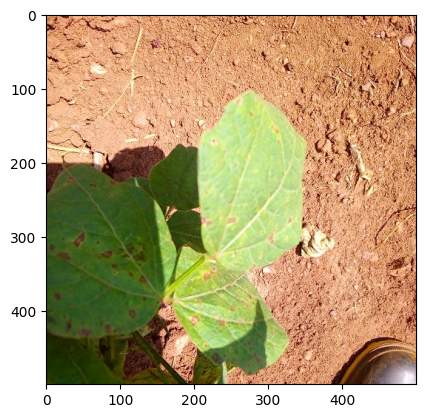

In [22]:
plt.imshow(img_angular_leaf_spot)

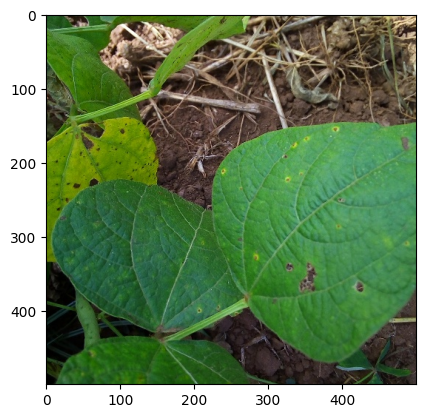

In [23]:
plt.imshow(img_bean_rust)

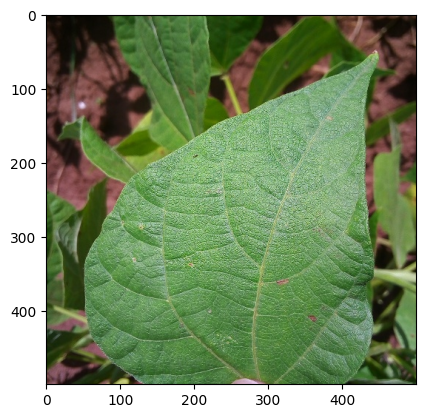

In [24]:
plt.imshow(img_healthy)

##ImageDataGenerator

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
train_data_generator = ImageDataGenerator(rescale =1/255.0)
test_data_generator = ImageDataGenerator(rescale =1/255.0)

In [27]:
train_generator = train_data_generator.flow_from_directory(
                  directory = train_dir,
                  target_size = (224,224),
                  batch_size = 32,
                  class_mode = "categorical"
)

Found 1034 images belonging to 3 classes.


In [28]:
test_generator = test_data_generator.flow_from_directory(
                  directory = test_dir,
                  target_size = (224,224),
                  batch_size = 32,
                  class_mode = "categorical"
)

Found 133 images belonging to 3 classes.


In [29]:
batch_images,batch_labels = next(iter(train_generator))

In [30]:
batch_images.shape

(32, 224, 224, 3)

In [31]:
batch_labels.shape

(32, 3)

In [32]:
batch_labels

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [33]:
train_generator.class_indices

{'angular_leaf_spot': 0, 'bean_rust': 1, 'healthy': 2}

In [34]:
batch_images[3].shape

(224, 224, 3)

##Modeling

In [35]:
import tensorflow as tf

In [36]:
model = tf.keras.models.Sequential([
    #Extraction de caratéristiques
    tf.keras.layers.Conv2D(filters = 32,kernel_size = (3,3),padding ="same",activation = 'relu',input_shape = (224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters = 128,kernel_size = (3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters = 128 , kernel_size = (3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    #applatir
    tf.keras.layers.Flatten(),
    #Dense
    tf.keras.layers.Dense(units=128,activation = "relu"),
    tf.keras.layers.Dense(units=3,activation = "softmax"),
])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [38]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath = "best_model.h5",
                                               monitor = "val_accuracy",
                                               mode = "max",
                                               save_best_only = True
)
stop = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",patience = 8,restore_best_weights=True)
model.compile(optimizer = "adam",loss ="categorical_crossentropy",metrics = ['accuracy'])
h = model.fit(train_generator,epochs = 50, validation_data = test_generator,callbacks = [model_ckp,stop])

Epoch 1/50
33/33 [==============================] - 18s 182ms/step - loss: 1.0880 - accuracy: 0.4004 - val_loss: 1.0563 - val_accuracy: 0.3835


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
33/33 [==============================] - 5s 141ms/step - loss: 0.9879 - accuracy: 0.5193 - val_loss: 0.8987 - val_accuracy: 0.5714
Epoch 3/50
33/33 [==============================] - 6s 172ms/step - loss: 0.8745 - accuracy: 0.6054 - val_loss: 0.7577 - val_accuracy: 0.6391
Epoch 4/50
33/33 [==============================] - 4s 135ms/step - loss: 0.7672 - accuracy: 0.6547 - val_loss: 0.7180 - val_accuracy: 0.6617
Epoch 5/50
33/33 [==============================] - 5s 158ms/step - loss: 0.6754 - accuracy: 0.6992 - val_loss: 0.6373 - val_accuracy: 0.6992
Epoch 6/50
33/33 [==============================] - 5s 136ms/step - loss: 0.5888 - accuracy: 0.7447 - val_loss: 0.6843 - val_accuracy: 0.7068
Epoch 7/50
33/33 [==============================] - 6s 182ms/step - loss: 0.5340 - accuracy: 0.7824 - val_loss: 0.8084 - val_accuracy: 0.6992
Epoch 8/50
33/33 [==============================] - 5s 136ms/step - loss: 0.5538 - accuracy: 0.7669 - val_loss: 0.7279 - val_accuracy: 0.6165
Epoch 

In [39]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


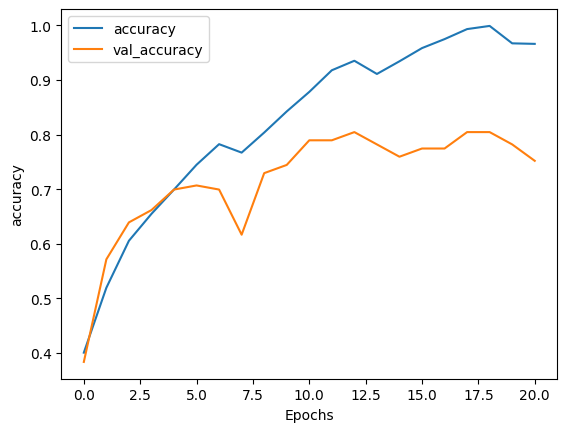

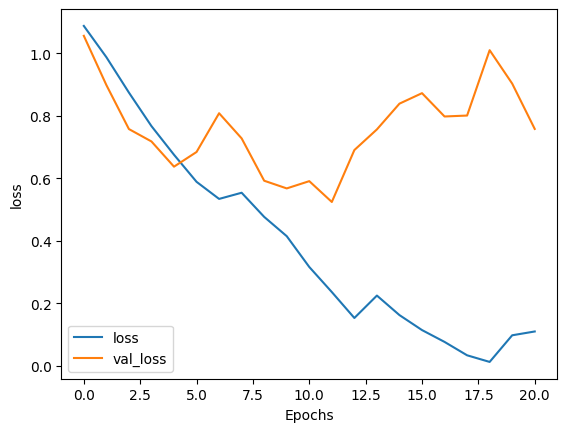

In [40]:
plot_graphs(h,'accuracy')
plot_graphs(h,"loss")

#Data Augmentation

In [41]:
#avant augmentation
train_data_generator = ImageDataGenerator(rescale =1/255.0)
test_data_generator = ImageDataGenerator(rescale =1/255.0)

#après augmentation
train_data_generator = ImageDataGenerator(rescale =1/255.0,rotation_range = 40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode="nearest")
test_data_generator = ImageDataGenerator(rescale =1/255.0)

train_generator = train_data_generator.flow_from_directory(
    directory = train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "categorical"
    )

train_generator = train_data_generator.flow_from_directory(
     directory = train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "categorical"
    )

Found 1034 images belonging to 3 classes.
Found 1034 images belonging to 3 classes.


In [42]:
model = tf.keras.models.Sequential([
    #Extraction de caratéristiques
    tf.keras.layers.Conv2D(filters = 32,kernel_size = (3,3),padding ="same",activation = 'relu',input_shape = (224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters = 128,kernel_size = (3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters = 128 , kernel_size = (3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    #applatir
    tf.keras.layers.Flatten(),
    #Dense
    tf.keras.layers.Dense(units=128,activation = "relu"),
    tf.keras.layers.Dense(units=3,activation = "softmax"),
])

In [44]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath = "aug_model.h5",
                                               monitor = "val_accuracy",
                                               mode = "max",
                                               save_best_only = True
)
stop = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",patience = 8,restore_best_weights=True)
model.compile(optimizer = "adam",loss ="categorical_crossentropy",metrics = ['accuracy'])
h = model.fit(train_generator,epochs = 50, validation_data = test_generator,callbacks = [model_ckp,stop])

Epoch 1/50
33/33 [==============================] - 18s 496ms/step - loss: 1.1462 - accuracy: 0.3801 - val_loss: 1.0519 - val_accuracy: 0.3609
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/33 [==============================] - 17s 525ms/step - loss: 0.9803 - accuracy: 0.5155 - val_loss: 0.7674 - val_accuracy: 0.6617
Epoch 3/50
33/33 [==============================] - 17s 519ms/step - loss: 0.8684 - accuracy: 0.5899 - val_loss: 0.7112 - val_accuracy: 0.7444
Epoch 4/50
33/33 [==============================] - 17s 502ms/step - loss: 0.8081 - accuracy: 0.6325 - val_loss: 0.6268 - val_accuracy: 0.7368
Epoch 5/50
33/33 [==============================] - 16s 501ms/step - loss: 0.8091 - accuracy: 0.6344 - val_loss: 0.6818 - val_accuracy: 0.6767
Epoch 6/50
33/33 [==============================] - 17s 510ms/step - loss: 0.7485 - accuracy: 0.6634 - val_loss: 0.5865 - val_accuracy: 0.7669
Epoch 7/50
33/33 [==============================] - 17s 504ms/step - loss: 0.7312 - accuracy: 0.6867 - val_loss: 0.7015 - val_accuracy: 0.6767
Epoch 8/50
33/33 [==============================] - 17s 504ms/step - loss: 0.6978 - accuracy: 0.7079 - val_loss: 0.6522 - val_accuracy: 0.7143
Epoch 9/50

In [45]:
##best performance in this case : loss: 0.3866 - accuracy: 0.8404 - val_loss: 0.2634 - val_accuracy: 0.9023

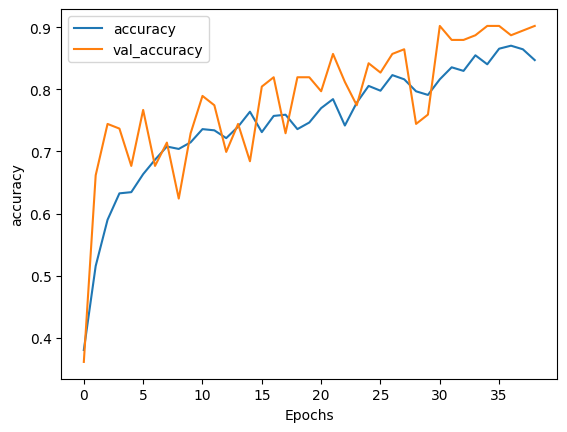

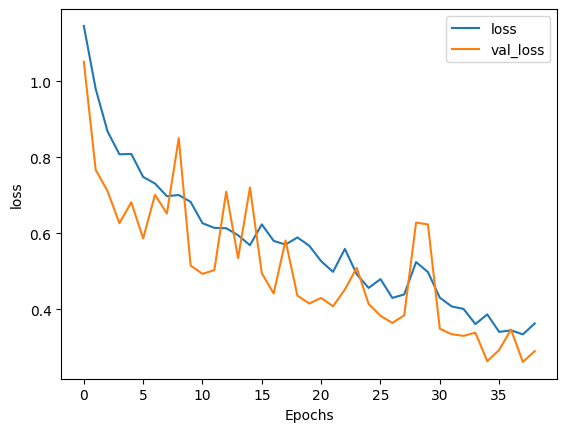

In [46]:
plot_graphs(h,'accuracy')
plot_graphs(h,"loss")

In [73]:
model = tf.keras.models.Sequential([
    #Extraction de caratéristiques
    tf.keras.layers.Conv2D(filters = 32,kernel_size = (3,3),padding ="same",activation = 'relu',input_shape = (224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters = 128,kernel_size = (3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters = 128 , kernel_size = (3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    #applatir
    tf.keras.layers.Flatten(),
    #Dense
    tf.keras.layers.Dense(units=128,activation = "relu"),
    tf.keras.layers.Dense(units=3,activation = "softmax"),
])

In [76]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath = "aug_model.h5",
                                               monitor = "val_accuracy",
                                               mode = "max",
                                               save_best_only = True
)
stop = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",patience = 60,restore_best_weights=True)
model.compile(optimizer = "adam",loss ="categorical_crossentropy",metrics = ['accuracy'])
h = model.fit(train_generator,epochs = 50, validation_data = test_generator,callbacks = [model_ckp,stop])

Epoch 1/50
33/33 [==============================] - 19s 511ms/step - loss: 0.6074 - accuracy: 0.7466 - val_loss: 0.3840 - val_accuracy: 0.8571
Epoch 2/50
33/33 [==============================] - 20s 613ms/step - loss: 0.5840 - accuracy: 0.7602 - val_loss: 0.7626 - val_accuracy: 0.6466
Epoch 3/50
33/33 [==============================] - 18s 549ms/step - loss: 0.5520 - accuracy: 0.7669 - val_loss: 0.4832 - val_accuracy: 0.7970
Epoch 4/50
33/33 [==============================] - 17s 519ms/step - loss: 0.5385 - accuracy: 0.7737 - val_loss: 0.7643 - val_accuracy: 0.6541
Epoch 5/50
33/33 [==============================] - 17s 525ms/step - loss: 0.5807 - accuracy: 0.7602 - val_loss: 0.5232 - val_accuracy: 0.7444
Epoch 6/50
33/33 [==============================] - 18s 532ms/step - loss: 0.5661 - accuracy: 0.7747 - val_loss: 0.4891 - val_accuracy: 0.7669
Epoch 7/50
33/33 [==============================] - 17s 527ms/step - loss: 0.5512 - accuracy: 0.7689 - val_loss: 0.4785 - val_accuracy: 0.8045

In [77]:
##Best model in this dataset performance :loss: 0.1604 - accuracy: 0.9381 - val_loss: 0.1084 - val_accuracy: 0.9774

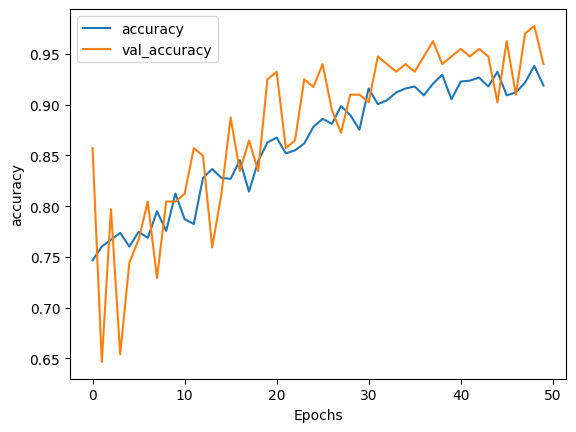

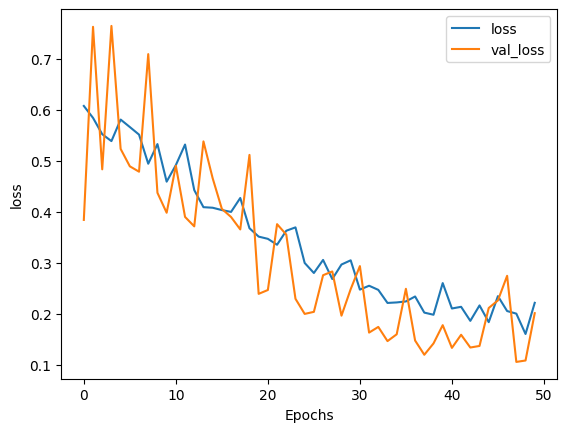

In [78]:
plot_graphs(h,'accuracy')
plot_graphs(h,"loss")